# 1 Hands On: Data Import and Manipulation

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pyarrow.feather as feather

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the currents directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/echocardiogram/uci-echocardiogram/Index.txt
/kaggle/input/echocardiogram/uci-echocardiogram/echocardiogram.names.txt
/kaggle/input/echocardiogram/uci-echocardiogram/echocardiogram.data.csv
/kaggle/input/networkcsv/Network.csv
/kaggle/input/new-york-city-air-quality/socrata_metadata.json
/kaggle/input/new-york-city-air-quality/air-quality.csv
/kaggle/input/new-york-city-air-quality/OutdoorAirandHealthInfoSource.csv
/kaggle/input/new-york-city-air-quality/DOHMH_AirQuality_DataDictionary.xlsx
/kaggle/input/servicearea/ServiceArea.csv


## 1. Introdution to Python for maching learning

**(a) Create an array of 10 random integers between 1 and 100, and then calculate the mean and standard deviation of the array.**


In [9]:
a = (np.random.randint(1, 100, 10, int))
print(a)
print(type(a))
print(len(a))

print(a.mean())
print(np.std(a))


[62 62 82 45 49  3 10  8 33 32]
<class 'numpy.ndarray'>
10
38.6
24.94874746355015


**(b) Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculate the sum of each row and column.**

In [10]:
b = (np.random.randint(1, 10, size=(3,4)))
print(b)

b_sum_row = np.sum(b, axis=1)
print(b_sum_row)

b_sum_col = np.sum(b, axis=0)
print(b_sum_col)

[[4 4 8 5]
 [5 2 5 2]
 [5 6 8 7]]
[21 14 26]
[14 12 21 14]


**(c) Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than or equal to 30.**


In [11]:
data={
    "Name":["Victor", "Ed", "Luis", "Juan", "Alex"],
    "Age":[12, 15, 26, 45, 66],
    "City":["Quito", "Cali", "Manta", "Loja", "Cuenca"]
}

df = pd.DataFrame(data)
print(df)
df_filter = df[df['Age'] >= 30]
print(df_filter)

     Name  Age    City
0  Victor   12   Quito
1      Ed   15    Cali
2    Luis   26   Manta
3    Juan   45    Loja
4    Alex   66  Cuenca
   Name  Age    City
3  Juan   45    Loja
4  Alex   66  Cuenca


**(d) Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the columns in the DataFrame.**

In [ ]:
from scipy import stats

df2 = pd.read_csv("../input/networkcsv/Network.csv")
print(np.mean(df2["IssuerId"]))
print(np.std(df2["IssuerId"]))
print(stats.mode(df2["IssuerId"]))

**(e) Create a scatter plot of random x and y values between 1 and 100.**


Text(0, 0.5, 'Y')

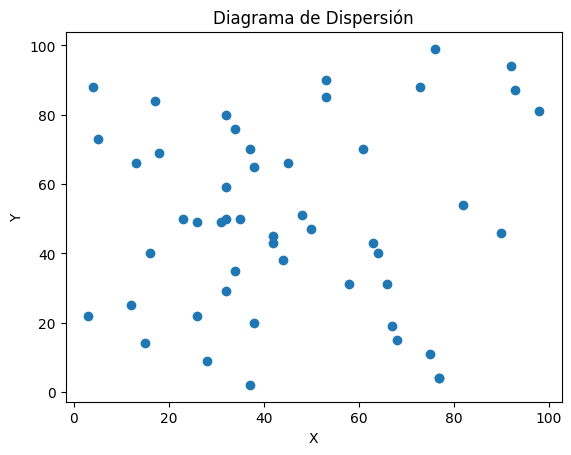

In [13]:
x_val= np.random.randint(1,100,50)
y_val= np.random.randint(1,100,50)

plt.scatter(x_val, y_val)

plt.title("Diagrama de Dispersión")
plt.xlabel("X")
plt.ylabel("Y")

**(f) Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.**

Text(0, 0.5, 'IssuerId2')

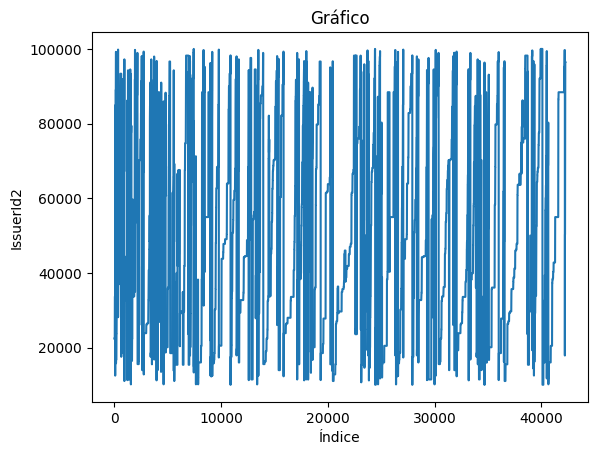

In [14]:
df3 = pd.read_csv("../input/servicearea/ServiceArea.csv")
df3
df3["IssuerId2"].plot(kind="line")
#plt.plot(df3["IssuerId2"])

plt.title('Gráfico')
plt.xlabel('Índice')
plt.ylabel("IssuerId2")

# 3. Data Import

## The Echocardiogram data set in the UCI Machine Learning repository contains information on a set of patients that suffered heart attacks at some point in the past.

**(a) Download the Echocardiogram data set and import it to a data frame. Read the information on the data set and find out how missing values are represented and make sure that they are properly represented.**


In [30]:
df4 = pd.read_csv("/kaggle/input/echocardiogram/uci-echocardiogram/echocardiogram.data.csv",  error_bad_lines=False)
df4

/tmp/ipykernel_34/1741537242.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df4 = pd.read_csv("/kaggle/input/echocardiogram/uci-echocardiogram/echocardiogram.data.csv",  error_bad_lines=False)
Skipping line 50: expected 13 fields, saw 14



,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
126,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
127,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
128,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


**(b) Assign the attributes with meaningful names. You can look for this information on the same webpage.**

In [33]:
nombres_atributos = ['survival ', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', "lvdd", "wall-motion-score", "wall-motion-index", "mult", "name", "group", "alive-at-1"]
df4 = df4.rename(columns=dict(zip(df4.columns, nombres_atributos)))

print(df4.head())

  survival   still-alive age-at-heart-attack  pericardial-effusion  \
0        19            0                  72                     0   
1        16            0                  55                     0   
2        57            0                  60                     0   
3        19            1                  57                     0   
4        26            0                  68                     0   

  fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                 0.380       6  4.100                14             1.700   
1                 0.260       4  3.420                14                 1   
2                 0.253  12.062  4.603                16             1.450   
3                 0.160      22  5.750                18             2.250   
4                 0.260       5  4.310                12                 1   

    mult  name group alive-at-1  
0  0.588  name     1          0  
1      1  name     1          0  
2  0.788

**(c) According to that same information, is there any redundant or irrelevant attribute that you can remove? Remove them.**

In [34]:
df4 = df4.drop("name", axis=1)
df4 = df4.drop("group", axis=1)
print(df4.head())

  survival   still-alive age-at-heart-attack  pericardial-effusion  \
0        19            0                  72                     0   
1        16            0                  55                     0   
2        57            0                  60                     0   
3        19            1                  57                     0   
4        26            0                  68                     0   

  fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                 0.380       6  4.100                14             1.700   
1                 0.260       4  3.420                14                 1   
2                 0.253  12.062  4.603                16             1.450   
3                 0.160      22  5.750                18             2.250   
4                 0.260       5  4.310                12                 1   

    mult alive-at-1  
0  0.588          0  
1      1          0  
2  0.788          0  
3  0.571          0  


**(d) Is there any data type change that you find useful? Perform it.**

In [36]:
diccionario_reemplazo = {1: True, 0: False}

df4["still-alive"] = df4["still-alive"].replace(diccionario_reemplazo)

print(df4.head())

  survival   still-alive age-at-heart-attack  pericardial-effusion  \
0        19        False                  72                     0   
1        16        False                  55                     0   
2        57        False                  60                     0   
3        19         True                  57                     0   
4        26        False                  68                     0   

  fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                 0.380       6  4.100                14             1.700   
1                 0.260       4  3.420                14                 1   
2                 0.253  12.062  4.603                16             1.450   
3                 0.160      22  5.750                18             2.250   
4                 0.260       5  4.310                12                 1   

    mult alive-at-1  
0  0.588          0  
1      1          0  
2  0.788          0  
3  0.571          0  


# 4. Data Manipulation


## Load the airquality data set regarding a set of New York Air Quality Measurements.

In [99]:
df5 = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")
df5

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


**(n) For which attributes are there missing values?**

In [100]:
df5.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

**(o) Do all the attributes are in the most suitable data type? Make the changes you find necessary.**

In [77]:
df5.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object

In [101]:
df5['Temp'] = df5['Temp'].astype(float)
df5.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp       float64
Month        int64
Day          int64
dtype: object

**(p) What period of the year do these records refer to?**

In [70]:
valor_max = df5["anio"].max()
valor_min = df5["anio"].min()

# Imprime los resultados
print("Valor máximo:", valor_max)
print("Valor mínimo:", valor_min)

Valor máximo: 2013.0
Valor mínimo: 2005.0


**(q) Load the package dplyr and save the data set in a table data frame format**

In [81]:
filtered_d5f = df5[df5['Month'] > 100]
selected_columns_df5 = df5[['Month', 'Temp', "Day"]]
grouped_df5 = df5.groupby('Month')['Temp'].mean()
sorted_df5 = df5.sort_values('Month')
filtered_d5f.to_csv('filtered_data.csv', index=False)
print(df5.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4  67.0      5    1
1   36.0    118.0   8.0  72.0      5    2
2   12.0    149.0  12.6  74.0      5    3
3   18.0    313.0  11.5  62.0      5    4
4    NaN      NaN  14.3  56.0      5    5


**(r) Select the days in May with a temperature above 70 Fahrenheit.**

In [84]:
dia_cal = df5[(df5['Month'] == 5) & (df5['Temp'] > 70)]
dia_cal

,Ozone,Solar.R,Wind,Temp,Month,Day
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
10,7.0,NaN,6.9,74.0,5,11
21,11.0,320.0,16.6,73.0,5,22
28,45.0,252.0,14.9,81.0,5,29
29,115.0,223.0,5.7,79.0,5,30
30,37.0,279.0,7.4,76.0,5,31


**(s) Create a new attribute TempC which represents the temperature values in Celsius**

In [107]:
df5['TempC'] = (df5['Temp'] - 32) * 5/9
print(df5.head())

   Ozone  Solar.R  Wind  Temp  Month  Day      TempC
0   41.0    190.0   7.4  67.0      5    1  19.444444
1   36.0    118.0   8.0  72.0      5    2  22.222222
2   12.0    149.0  12.6  74.0      5    3  23.333333
3   18.0    313.0  11.5  62.0      5    4  16.666667
4    NaN      NaN  14.3  56.0      5    5  13.333333


**(t) Inspect which were the 30 hottest days**

In [87]:
calDia = df5.sort_values('Temp', ascending=False)
calDia2 = calDia.head(30)
calDia2

,Ozone,Solar.R,Wind,Temp,Month,Day,TempC
119,76.0,203.0,9.7,97.0,8,28,36.111111
121,84.0,237.0,6.3,96.0,8,30,35.555556
122,85.0,188.0,6.3,94.0,8,31,34.444444
120,118.0,225.0,2.3,94.0,8,29,34.444444
41,NaN,259.0,10.9,93.0,6,11,33.888889
126,91.0,189.0,4.6,93.0,9,4,33.888889
125,73.0,183.0,2.8,93.0,9,3,33.888889
124,78.0,197.0,5.1,92.0,9,2,33.333333
42,NaN,250.0,9.2,92.0,6,12,33.333333
101,NaN,222.0,8.6,92.0,8,10,33.333333


**(u) Inspect which were the hottest days, but also with the highest ozone values.**


In [91]:
dia = df5.sort_values('Temp', ascending=False)

dia_cal = dia.iloc[5]

dia_temp = df5[df5['Temp'] == dia_cal['Temp']]

dia_cal_zn = dia_temp.sort_values('Ozone', ascending=False)

final = dia_cal_zn.head()

final

,Ozone,Solar.R,Wind,Temp,Month,Day,TempC
126,91.0,189.0,4.6,93.0,9,4,33.888889
125,73.0,183.0,2.8,93.0,9,3,33.888889
41,NaN,259.0,10.9,93.0,6,11,33.888889


**(v) Inspect the number of days for which there was a register for each month.**

In [103]:
dias = df5.groupby('Month')['Day'].nunique()
dias

Month
5    31
6    30
7    31
8    31
9    30
Name: Day, dtype: int64

**(w) For each month, obtain the minimum and the maximum temperature registered in Celsius.**

In [108]:
mes_temp = df5.groupby('Month')['TempC'].agg(['min', 'max'])

print(mes_temp)

             min        max
Month                      
5      13.333333  27.222222
6      18.333333  33.888889
7      22.777778  33.333333
8      22.222222  36.111111
9      17.222222  33.888889


**(x) Obtain the average of the following parameters by month: temperature in celsius, wind, solar radiation and ozone.**


In [109]:
mes_prom = df5.groupby('Month')['TempC', 'Wind', 'Solar.R', 'Ozone'].mean()

print(mes_prom)

           TempC       Wind     Solar.R      Ozone
Month                                             
5      18.637993  11.622581  181.296296  23.615385
6      26.166667  10.266667  190.166667  29.444444
7      28.835125   8.941935  216.483871  59.115385
8      28.870968   8.793548  171.857143  59.961538
9      24.944444  10.180000  167.433333  31.448276


/tmp/ipykernel_34/2505106206.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mes_prom = df5.groupby('Month')['TempC', 'Wind', 'Solar.R', 'Ozone'].mean()


**(y) What values did you obtain regarding ozone and solar radiation attributes? Why? Make the necessary change so that you get the average of the registered values.**